# Task
Analyze the data in "Diamonds Prices2022.csv".

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer

In [3]:
df = pd.read_csv('Diamonds Prices2022.csv')

In [3]:
display(df.head())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [79]:
df = df.drop('Unnamed: 0', axis=1)
display(df.head())
display(df.info())
display(df.describe())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
display(df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

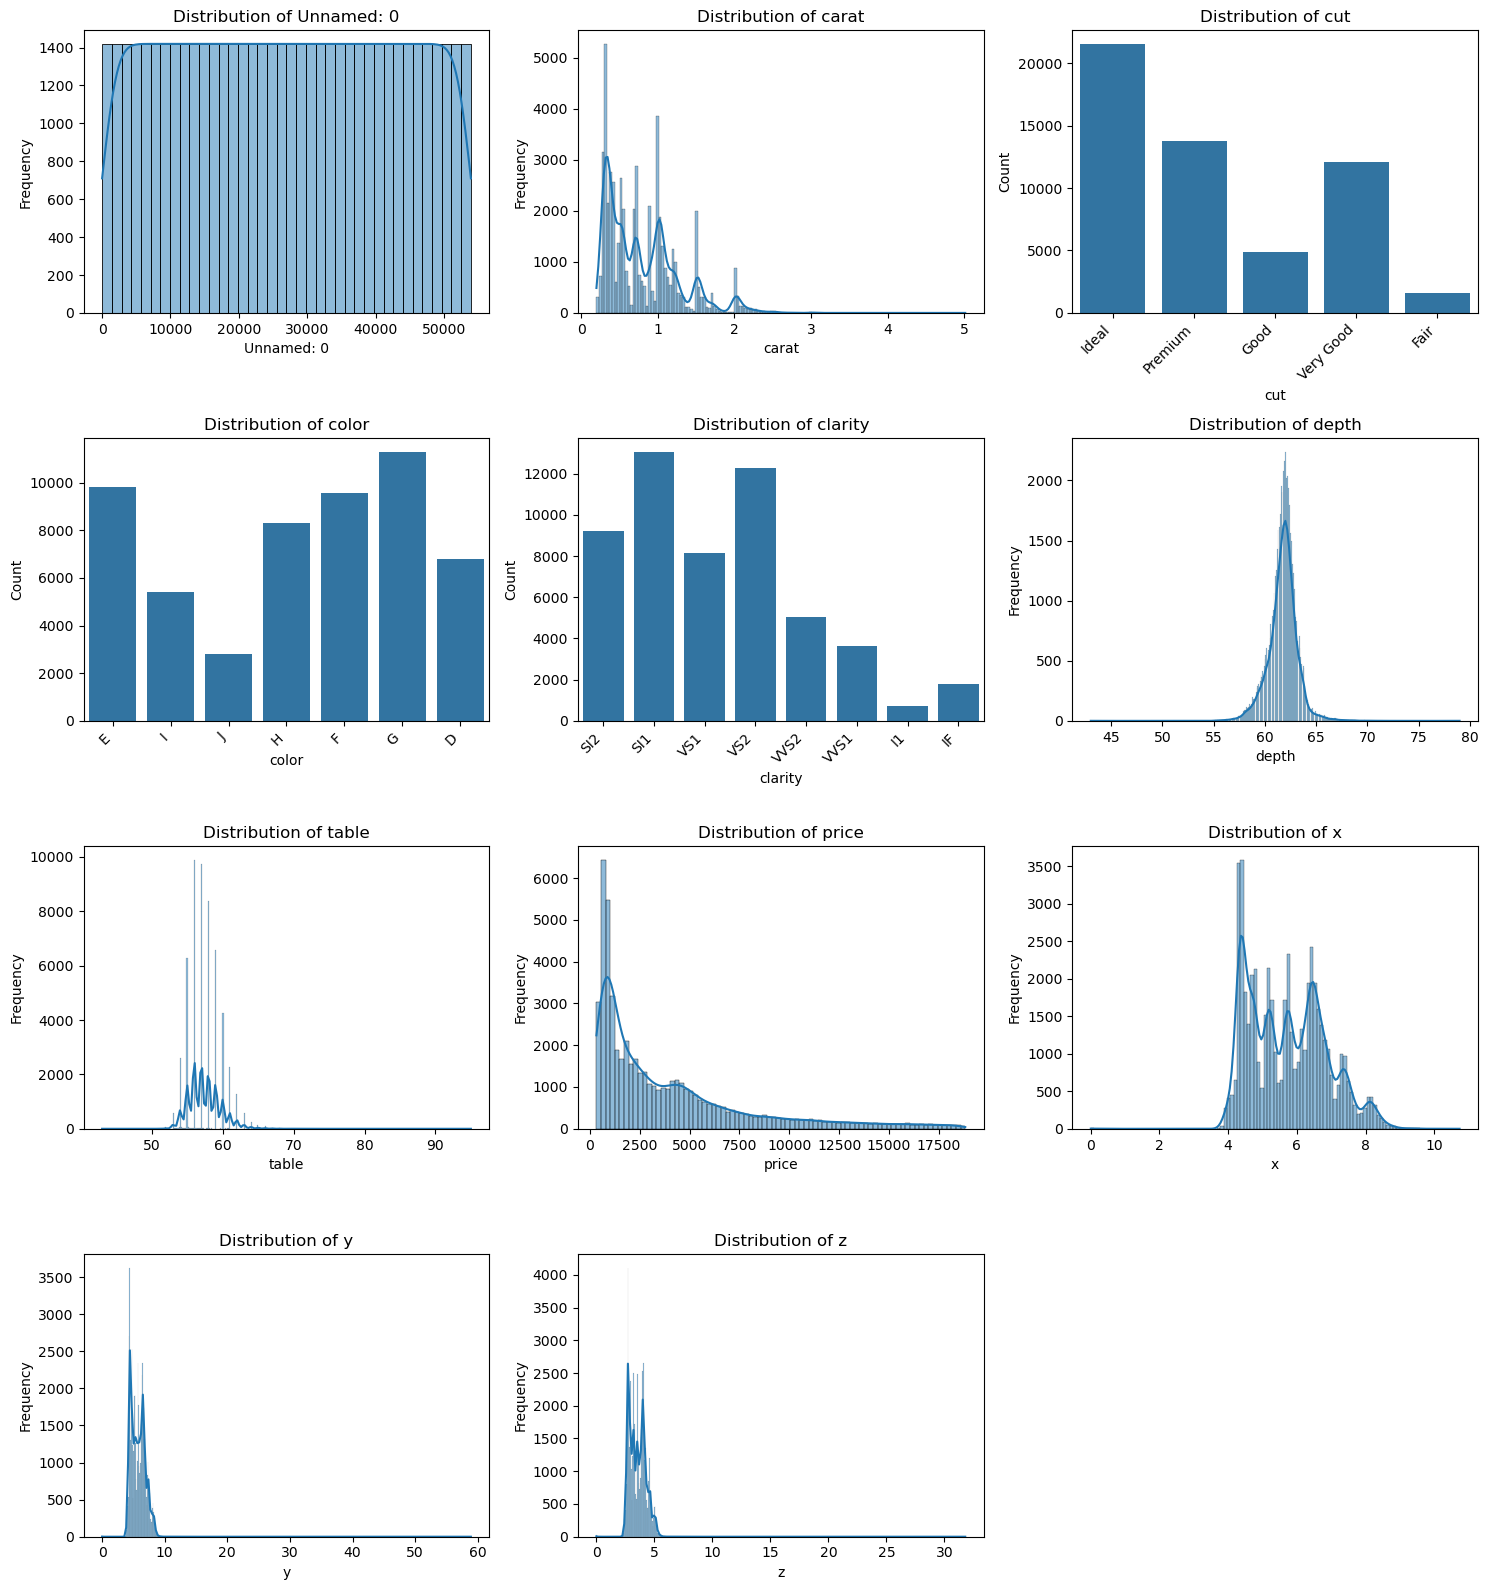

In [5]:
import numpy as np

# Get the list of columns
columns = df.columns

# Determine the number of plots and figure size
n_cols = 3 # Number of columns per row in the plot grid
n_rows = (len(columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on the number of plots

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1) # Create a subplot for each feature

    if df[col].dtype in ['int64', 'float64']:
        # Plot histogram for numerical features
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        # Plot count plot for categorical features
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SI2'),
  Text(1, 0, 'SI1'),
  Text(2, 0, 'VS1'),
  Text(3, 0, 'VS2'),
  Text(4, 0, 'VVS2'),
  Text(5, 0, 'VVS1'),
  Text(6, 0, 'I1'),
  Text(7, 0, 'IF')])

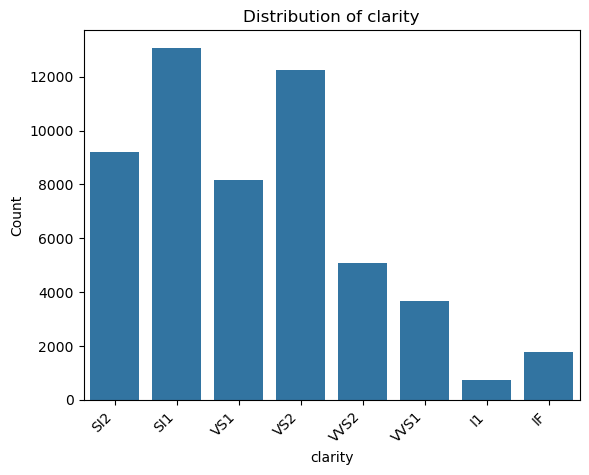

In [8]:
sns.countplot(x='clarity', data=df)
plt.title(f'Distribution of clarity')
plt.xlabel('clarity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability


Text(0, 0.5, 'Frequency')

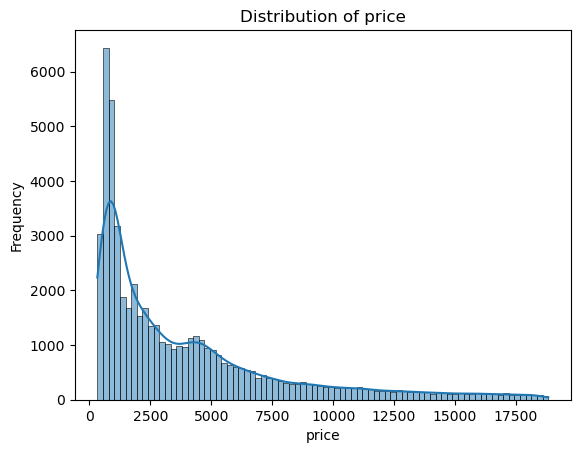

In [6]:
sns.histplot(df['price'], kde=True)
plt.title(f'Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

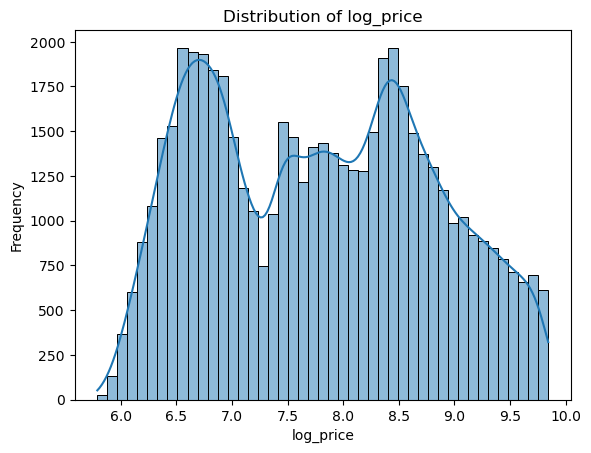

In [7]:
df['log_price'] = np.log1p(df['price'])
sns.histplot(df['log_price'], kde=True)
plt.title(f'Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')

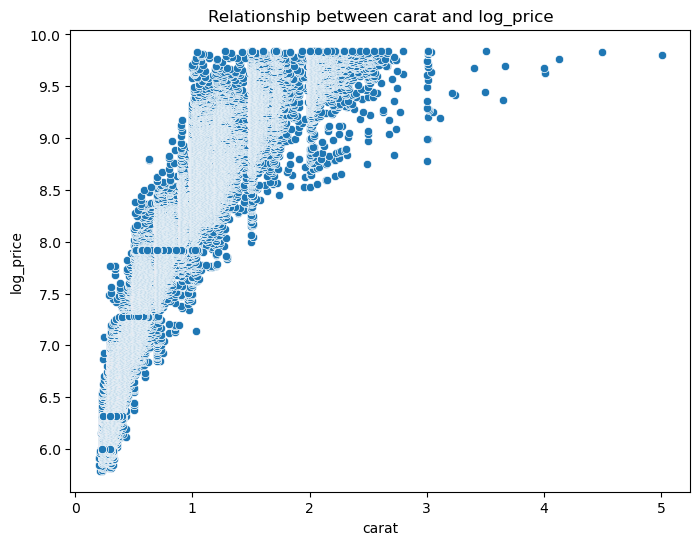

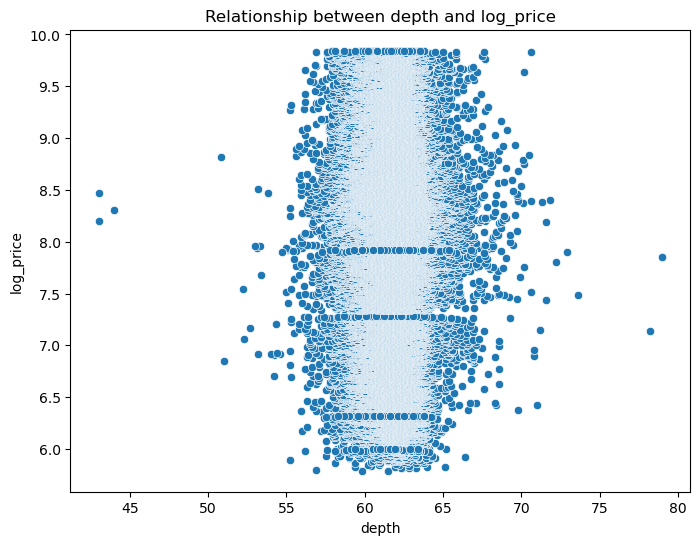

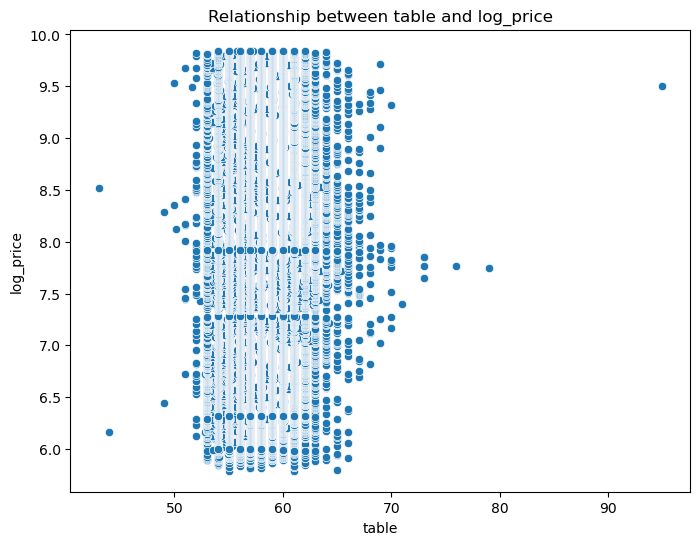

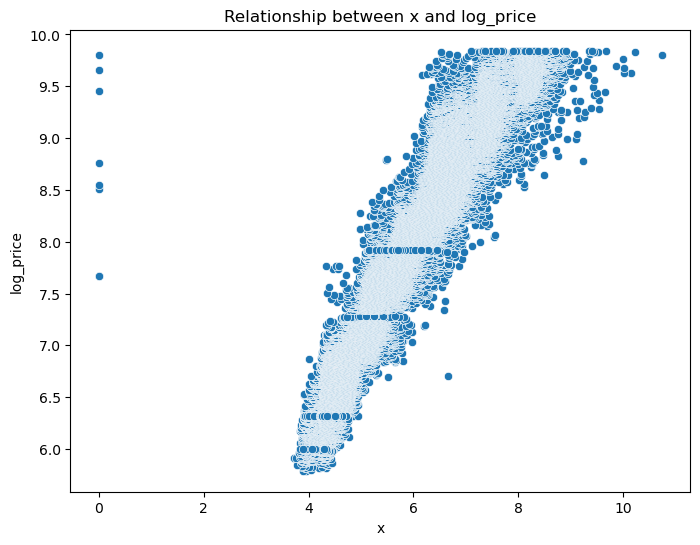

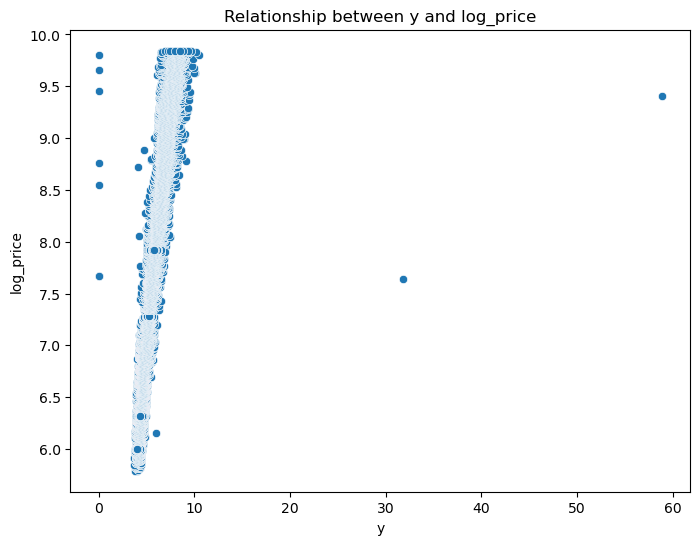

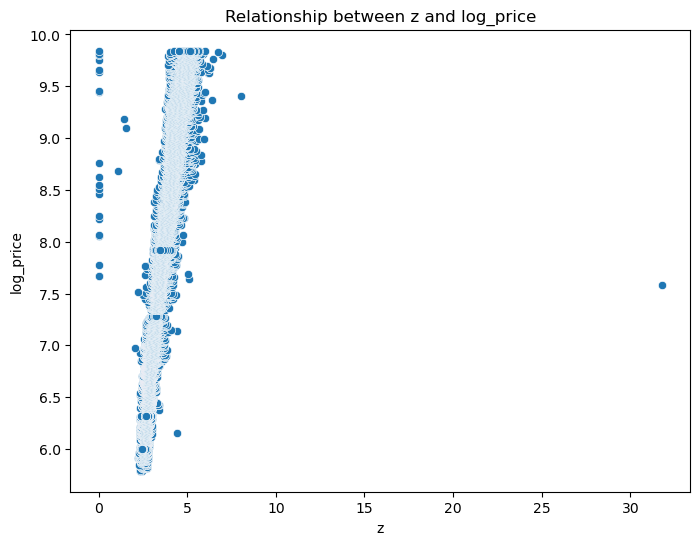

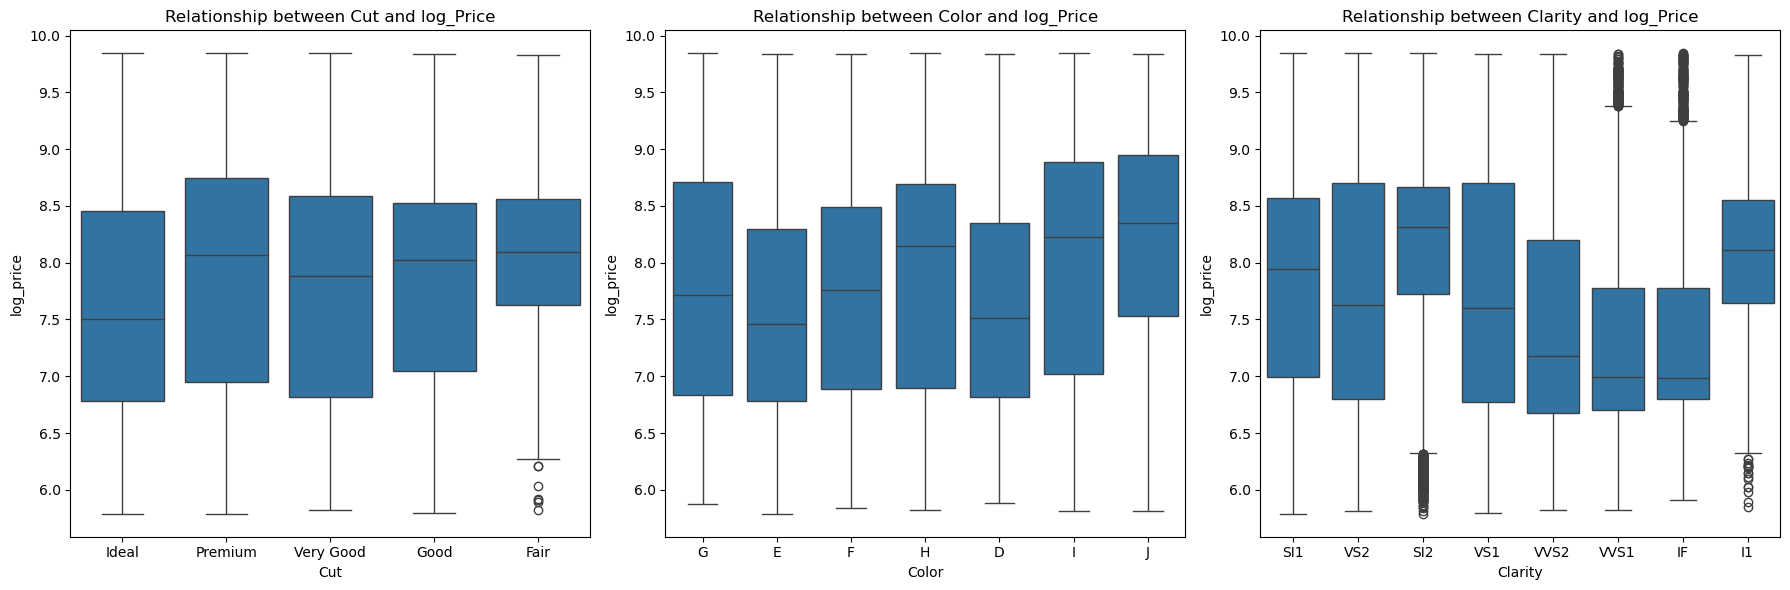

In [6]:
df['log_price']=np.log1p(df['price'])

numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
for column in numerical_cols:
    plt.figure(figsize=(8, 6)) 
    sns.scatterplot(x=column, y='log_price', data=df)
    plt.title(f'Relationship between {column} and log_price')
    plt.xlabel(f'{column}')
    plt.ylabel('log_price')
    plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='log_price', data=df, order=df['cut'].value_counts().index)
plt.title('Relationship between Cut and log_Price')
plt.xlabel('Cut')
plt.ylabel('log_price')

plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='log_price', data=df, order=df['color'].value_counts().index)
plt.title('Relationship between Color and log_Price')
plt.xlabel('Color')
plt.ylabel('log_price')

plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='log_price', data=df, order=df['clarity'].value_counts().index)
plt.title('Relationship between Clarity and log_Price')
plt.xlabel('Clarity')
plt.ylabel('log_price')

plt.tight_layout()
plt.show()

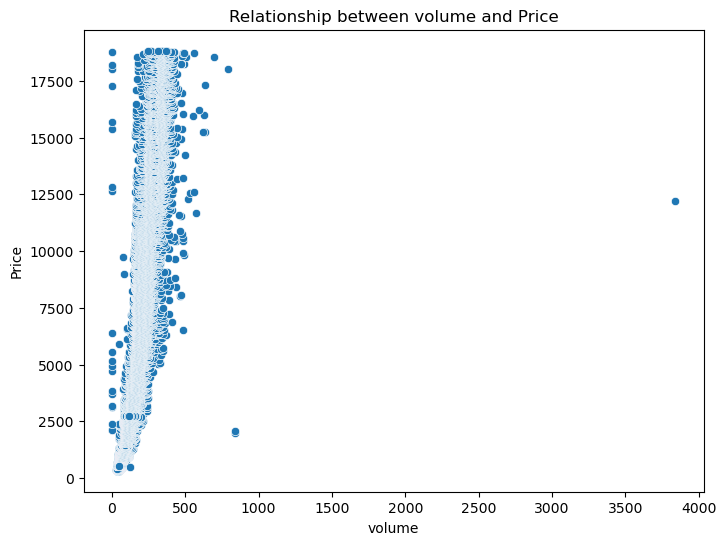

In [20]:
df['volume'] = df['x'] * df['y'] * df['z']
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='volume', y='price', data=df)
plt.title(f'Relationship between volume and Price')
plt.xlabel('volume')
plt.ylabel('Price')
plt.show()

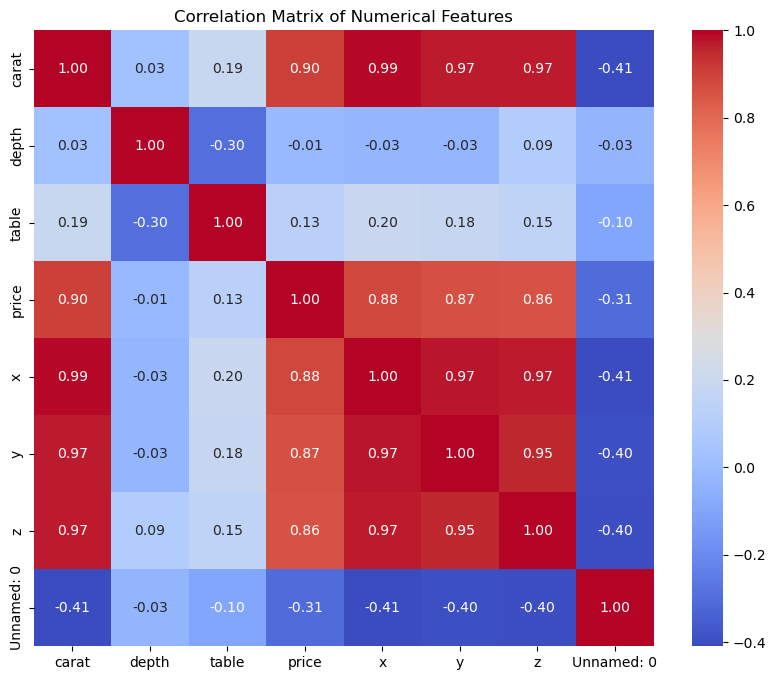

In [10]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z','Unnamed: 0']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

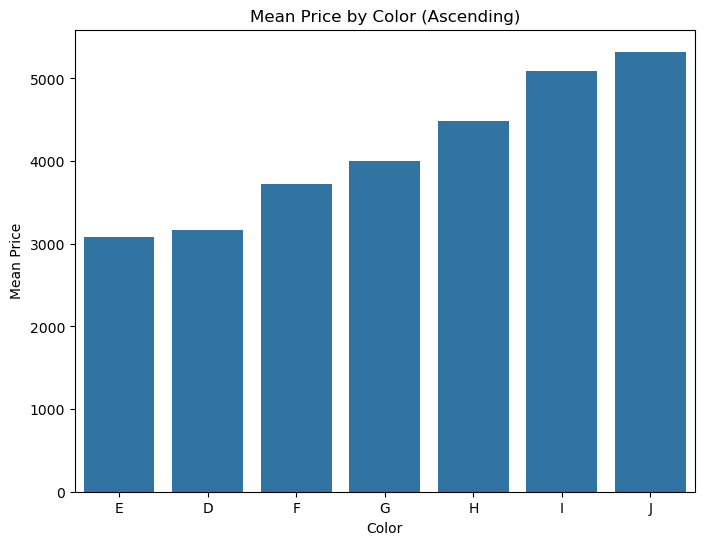

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_price = df.groupby("color")["price"].mean().reset_index()

sorted_colors = mean_price.sort_values("price")["color"]

plt.figure(figsize=(8,6))
sns.barplot(data=mean_price, x="color", y="price", order=sorted_colors)
plt.xlabel("Color")
plt.ylabel("Mean Price")
plt.title("Mean Price by Color (Ascending)")
plt.show()


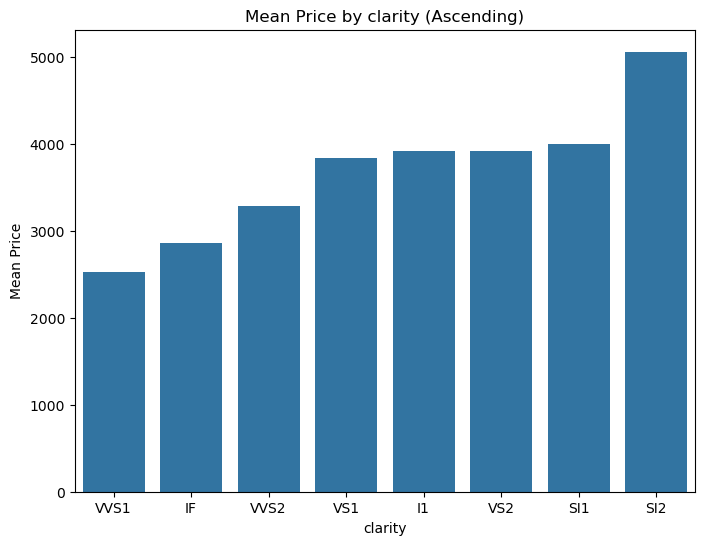

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_price = df.groupby("clarity")["price"].mean().reset_index()

sorted_colors = mean_price.sort_values("price")["clarity"]

plt.figure(figsize=(8,6))
sns.barplot(data=mean_price, x="clarity", y="price", order=sorted_colors)
plt.xlabel("clarity")
plt.ylabel("Mean Price")
plt.title("Mean Price by clarity (Ascending)")
plt.show()


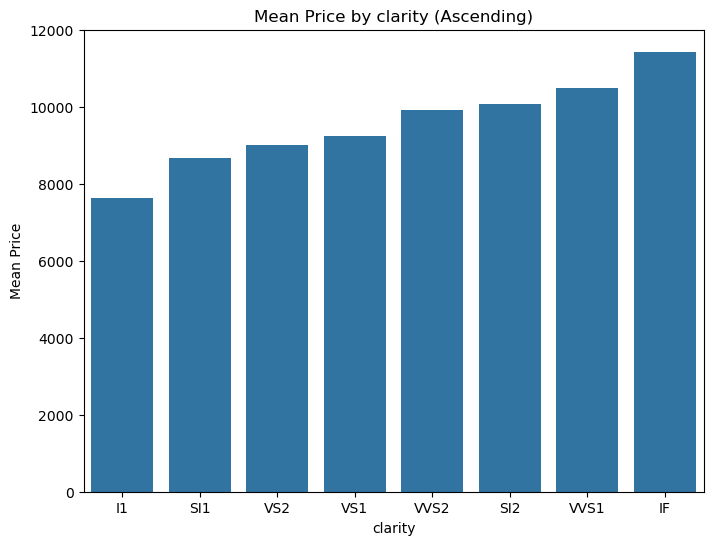

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

high_price_mask = df['price'] > 5000
df_h=df[high_price_mask]

very_high_price_mask =  df['price']  > 10000


mean_price = df_h.groupby("clarity")["price"].mean().reset_index()

sorted_colors = mean_price.sort_values("price")["clarity"]

plt.figure(figsize=(8,6))
sns.barplot(data=mean_price, x="clarity", y="price", order=sorted_colors)
plt.xlabel("clarity")
plt.ylabel("Mean Price")
plt.title("Mean Price by clarity (Ascending)")
plt.show()


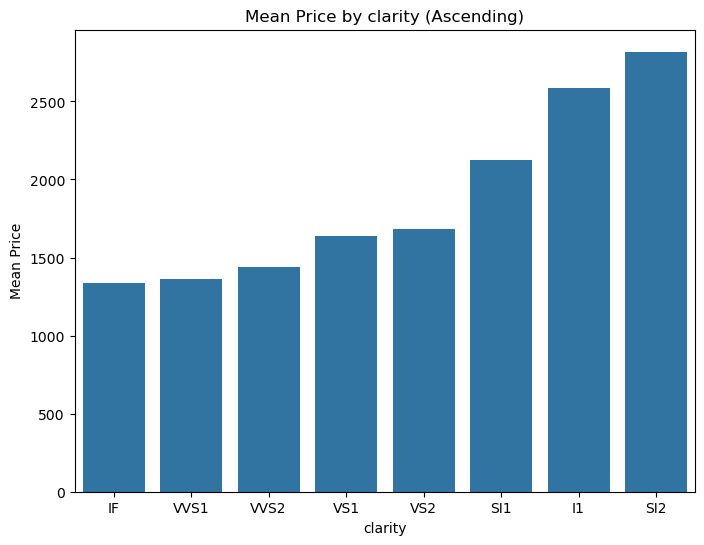

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

low_price_mask = df['price'] < 5000
df_l=df[low_price_mask]



mean_price = df_l.groupby("clarity")["price"].mean().reset_index()

sorted_colors = mean_price.sort_values("price")["clarity"]

plt.figure(figsize=(8,6))
sns.barplot(data=mean_price, x="clarity", y="price", order=sorted_colors)
plt.xlabel("clarity")
plt.ylabel("Mean Price")
plt.title("Mean Price by clarity (Ascending)")
plt.show()


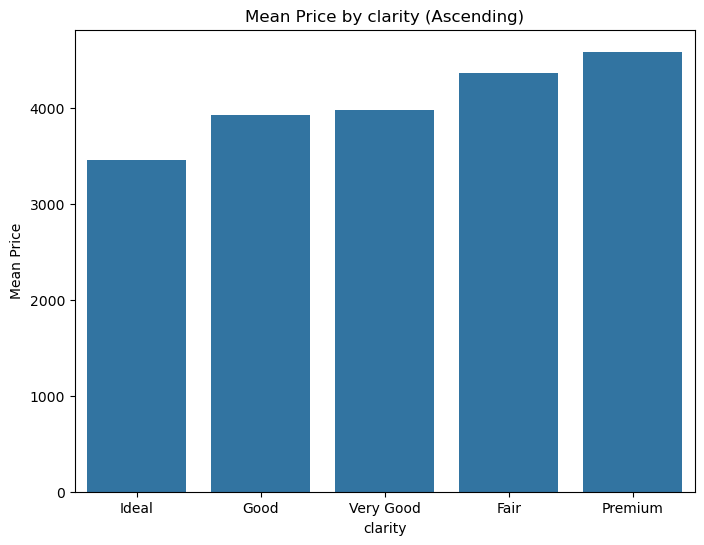

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_price = df.groupby("cut")["price"].mean().reset_index()

sorted_colors = mean_price.sort_values("price")["cut"]

plt.figure(figsize=(8,6))
sns.barplot(data=mean_price, x="cut", y="price", order=sorted_colors)
plt.xlabel("clarity")
plt.ylabel("Mean Price")
plt.title("Mean Price by clarity (Ascending)")
plt.show()


In [106]:
import pandas as pd
import scipy.stats as stats

# Cut vs Price
groups_cut = [group["price"].values for name, group in df.groupby("cut")]
f_cut, p_cut = stats.f_oneway(*groups_cut)
print("Cut vs Price: F-statistic =", f_cut, " | p-value =", p_cut)

# Color vs Price
groups_color = [group["price"].values for name, group in df.groupby("color")]
f_color, p_color = stats.f_oneway(*groups_color)
print("Color vs Price: F-statistic =", f_color, " | p-value =", p_color)

# Clarity vs Price
groups_clarity = [group["price"].values for name, group in df.groupby("clarity")]
f_clarity, p_clarity = stats.f_oneway(*groups_clarity)
print("Clarity vs Price: F-statistic =", f_clarity, " | p-value =", p_clarity)


Cut vs Price: F-statistic = 175.63263533586195  | p-value = 9.410997495179044e-150
Color vs Price: F-statistic = 290.2541415582281  | p-value = 0.0
Clarity vs Price: F-statistic = 215.0274318890462  | p-value = 1.86555794e-316
